In [32]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
objects = os.listdir('/data2/test/ig_dataset/objects/')

In [5]:
scene_objects = []
with open('/data2/test/ig_dataset/metadata/categories.txt', 'r') as f:
    for line in f:
        scene_objects.append(line.strip())

scene_objects = set(scene_objects)

In [9]:
objects = [item for item in objects if not item in scene_objects]
objects = [item for item in objects if not '.' in item]

In [25]:
def get_volume(fn):
    mesh = trimesh.load(fn)
    volume = mesh.volume
    return volume

def get_volume_mvbb(fn):
    lines = []
    with open(fn) as f:
        lines = f.readlines()
    return float(lines[-1])

results = []
commands = []
with open('mvbb.sh', 'w') as f:
    for obj_cat in objects:
        models = os.listdir(os.path.join('/data2/test/ig_dataset/objects/', obj_cat))
        for model in models:
            out_dir = os.path.join('/data2/test/ig_dataset/objects/', obj_cat, model, 'misc')
            collision_shape_dir = os.path.join('/data2/test/ig_dataset/objects/', obj_cat, model, 'shape', 'collision')
            #print(out_dir, collision_shape_dir)
            obj_files = os.listdir(collision_shape_dir)
            collision_shape_fn = os.path.join(collision_shape_dir, obj_files[0])
            #print(out_dir, collision_shape_fn)
            
            volume = get_volume(collision_shape_fn)
            mvbb_volume = get_volume_mvbb(os.path.join(out_dir, 'mvbb_out.txt'))
            
            results.append([obj_cat, model, volume, mvbb_volume])
            command = "{} {} {}\n".format(
                "/home/fei/Development/ApproxMVBB/build/example/approxMVBB_loadobj/ApproxMVBBExample-MVBB2",
                collision_shape_fn,
                out_dir
            )
            commands.append(command)

            f.write(command)

In [21]:
import sys
import os 
import multiprocessing
p = multiprocessing.Pool(5)
p.map(os.system, commands)


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [27]:
ratio = [item[2] / item[3] for item in results]
#print(ratio)

[0.8843702353391821, 0.8759162352803255, 0.8757200256703088, 0.8712468833591045, 0.8613632520221394, 0.8791996982821103, 0.8613632520221394, 0.8556990190502233, 0.81963512539933, 0.8251195171584738, 0.749813994352962, 0.1737662254893034, 0.15768784349268064, 0.07209047692567488, 0.15499553917599262, 0.158219291150423, 0.04508960762453763, 0.17185304400925883, 0.2847834168771231, 0.1291061490852694, 0.15338079644453606, 0.21406151038167381, 0.16865051683609456, 0.1563847034714624, 0.5420554112690401, 0.6856407514112145, 0.113212954329626, 0.5732314072284524, 0.34684450206031503, 0.35476929116666445, 0.9964687130160139, 0.7858542537834942, 0.9921686272269601, 0.7859991021926581, 0.5976059348306668, 0.5958265285723992, 0.7769750453738894, 0.7857381993168862, 0.7858686250374418, 0.5938211305046334, 0.9859724907967781, 0.6000714976139355, 0.7858996004934103, 0.9761788158863015, 0.0485728975486933, 0.5360673331242568, 0.18151067958780698, 0.17786224202549242, 0.39118047640575354, 0.526018044

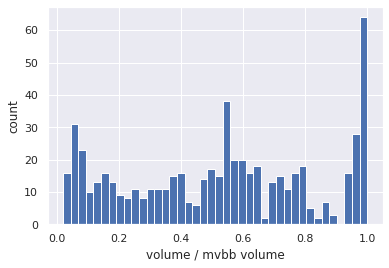

In [34]:
plt.hist(ratio, 40)
plt.xlabel('volume / mvbb volume')
plt.ylabel('count')
plt.savefig('ratio.png')

In [35]:
filtered_results = [item for item in results if item[2] / item[3] > 0.9]


In [41]:
for item in filtered_results:
    print(",".join(map(str, item)))

cracker_box,cracker_box_000,0.09196359928989141,0.0922895
chip,28,0.007651336567644965,0.00771173
chip,26,0.011141686340501751,0.0113002
puffed_rice,17,0.0018807646774155016,0.00192666
hardback,hardback_000,802.0986472364784,802.368
shampoo,True_Professional_Oil_of_Morocco_Argan_Oil_Treatment_Light_Blue_Box,0.0004346706468173321,0.000441602
shampoo,Strictly_Curls_Curl_Envy_Perfect_Curl_Cream_Yellow_Box,0.0009929740343564773,0.00104542
shampoo,Shampoo_In_Haircolor_Jet_Black_60_Box_Grey_Red,0.0005810100724646261,0.000605414
shampoo,Shampoo_In_Haircolor_Light_Brown_Grey_Box,0.000580553175318579,0.000600725
lasagna,27,0.0015955017006632649,0.00162684
lasagna,31,0.001153230259193431,0.0011761
corn_flake,33,0.0018785143956369182,0.00192666
corn_flake,11,0.0018807646774155016,0.00192666
corn_flake,25,0.0028982403791735973,0.00293257
corn_flake,15,0.002902439891778322,0.00293223
corn_flake,13,0.002902439891778322,0.00293223
pop_case,33,0.006940306958386273,0.00694076
pop_case,48,0.015413204839

In [42]:
len(ratio)

593